In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta 

from src.data_prep import *

plt.style.use('ggplot')
%matplotlib inline

## Data Preparation 

In [2]:
#Reading in the data
data = pd.read_pickle('../junyi_df.pickle')

#Dropping Un-needed Columns
data = drop_columns(data)

#Changing Bools to Int
data = change_bool(data)

#Convert Unix datetime to DateTime
data = convert_dates(data, 'time_done')

#Choosing Date Range
#data = select_date(data, 'time_done', '1/1/2014', '9/30/2014')


In [4]:
data['time_done'].max()

Timestamp('2015-01-11 18:14:25.650430')

In [5]:
data['time_done'].min()

Timestamp('2012-10-12 01:03:55.131230')

In [9]:
data['week'] = data['time_done'].dt.week

In [10]:
data['year'] = data['time_done'].dt.year

In [13]:
data['time_done'][0]

Timestamp('2015-01-08 11:00:10.324490')

In [20]:
data['year_week'] = data['time_done'].apply(lambda x: x.isocalendar()[0:2])

In [22]:
data.groupby(['user_id','year_week']).sum()

,,topic_mode,suggested,review_mode,time_taken,correct,count_attempts,hint_used,count_hints,earned_proficiency,points_earned,week,year
user_id,year_week,,,,,,,,,,,,
0,"(2014, 45)",0,7,0,145,7,10,1,1,0,1575,360,16112
1,"(2014, 14)",9,15,0,398,20,42,2,14,2,3819,378,54378
2,"(2014, 28)",23,22,0,1057,36,69,3,4,3,6201,1092,78546
3,"(2014, 35)",1,14,0,5233,167,199,3,12,5,5466,6370,366548
4,"(2014, 8)",0,5,0,62,8,8,0,0,1,1164,64,16112
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247602,"(2014, 25)",1,0,0,2801,40,69,0,0,0,2576,1300,104728
247603,"(2014, 29)",0,0,0,26,1,1,0,0,0,75,29,2014
247604,"(2014, 47)",2,0,0,224,25,31,0,0,2,1114,1222,52364


## Creating the Users Table 

In [194]:
#Creating User Table with sums of data points
users = data.groupby('user_id').sum()

user_table = pd.DataFrame(users)

#Creating a time variable rng
user_time = data.groupby('user_id')
rng = (user_time['time_done'].max() - user_time['time_done'].min()).dt.days

#Cutting Table to include only users with 10 or more days active
user_table = user_table[(rng>9)]

#Creating Squared Hints, Correct, Review_Mode(Unused in final )
    # user_table['count_hints_sq'] = user_table['count_hints'] **2 
    # user_table['count_attempts_sq'] = user_table['count_attempts'] **2 
    # user_table['review_mode_sq'] = user_table['review_mode'] **2
    # user_table['correct_sq'] = user_table['correct'] **2

#Creating a More than 10 activities columns
total_usage = data['user_id'].value_counts().sort_index()
user_table['total_usage'] = total_usage


#Unused in final table
    #user_table['more_than_100_activities'] = (total_usage > 100).astype(int)
    #user_table['more_than_1000_activities'] = (total_usage > 1000).astype(int)
    #user_table['more_than_ten_activities'] = (total_usage > 10).astype(int)

#Creating a More than X day columns
user_time = data.groupby('user_id')
rng = (user_time['time_done'].max() - user_time['time_done'].min()).dt.days

#The columns below did not end up in the final table
    #user_table['active_more_than_1_day'] = (rng > 0).astype(int)
    #user_table['active_at_least_5_days'] = (rng >= 4).astype(int)
    #user_table['active_at_least_10_days'] = (rng >= 9).astype(int)

active_from_last= (data['time_done'].max() - (user_time['time_done'].max())).dt.days
user_table['active_from_last'] = active_from_last

#active_from_last_sq = active_from_last ** 2
#user_table['active_from_last_sq'] = active_from_last_sq



#Creating a 7 day streak columns
one_before = ((data['time_done'].max())- timedelta(1))
two_before = ((data['time_done'].max())- timedelta(2))
three_before = ((data['time_done'].max())- timedelta(3))
four_before = ((data['time_done'].max())- timedelta(4)) 
five_before = ((data['time_done'].max())- timedelta(5))
six_before =((data['time_done'].max())- timedelta(6))
seven_before =((data['time_done'].max())- timedelta(7))

user_table['one_before'] = ((one_before - (user_time['time_done'].max())).dt.days == 0).astype(int)
user_table['two_before'] = ((two_before - (user_time['time_done'].max())).dt.days == 0).astype(int)
user_table['three_before'] = ((three_before - (user_time['time_done'].max())).dt.days == 0).astype(int)
user_table['four_before'] = ((four_before - (user_time['time_done'].max())).dt.days == 0).astype(int)
user_table['five_before'] = ((five_before - (user_time['time_done'].max())).dt.days == 0).astype(int)
user_table['six_before'] = ((six_before - (user_time['time_done'].max())).dt.days == 0).astype(int)
user_table['seven_before'] = ((seven_before - (user_time['time_done'].max())).dt.days == 0).astype(int



### Creating the Target and Saving User Table 

In [481]:
target = create_target('../junyi_df.pickle', '10/1/2014', '10/31/2014', user_table)

In [ ]:
#Dropping if colums if needed before adding target and saving
    #user_table.drop(columns=['target'], inplace=True)
    #user_table.drop(columns=['active_at_least_10_days', 'active_at_least_5_days', 'active_more_than_1_day'], inplace=True)

In [486]:
user_table['target'] = target.values()
user_table.head(5)

,topic_mode,suggested,review_mode,time_taken,correct,count_attempts,hint_used,count_hints,earned_proficiency,points_earned,total_usage,active_from_last,one_before,two_before,three_before,four_before,five_before,six_before,seven_before,target
user_id,,,,,,,,,,,,,,,,,,,,
8,147,81,0,1600,192,277,8,53,16,28843,230,80,0,0,0,0,0,0,0,0
9,73,20,0,2860,110,251,9,20,5,17122,150,29,0,0,0,0,0,0,0,0
52,996,417,128,28680,2926,3705,33,108,195,264204,3222,148,0,0,0,0,0,0,0,0
78,24,10,0,1630,81,171,13,49,2,6071,111,172,0,0,0,0,0,0,0,0
80,33,16,0,579,31,35,2,7,3,5787,34,35,0,0,0,0,0,0,0,1


In [427]:
user_table.columns

Index(['topic_mode', 'suggested', 'review_mode', 'time_taken', 'correct',
       'count_attempts', 'hint_used', 'count_hints', 'earned_proficiency',
       'points_earned', 'more_than_ten_activities', 'more_than_100_activities',
       'more_than_1000_activities', 'active_from_last', 'sum_attempts',
       'one_before', 'two_before', 'three_before', 'four_before',
       'five_before', 'six_before', 'seven_before', 'total_usage', 'target'],
      dtype='object')

In [469]:
#Save table and make sure to change version
# For testing set, choose slice of data and follow same steps

user_table.to_csv('../users_final.csv')

### Plotting each feature against the target  

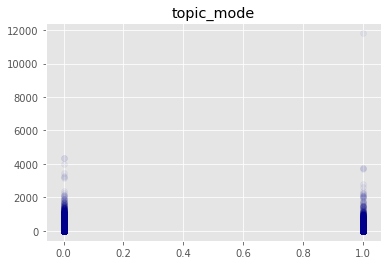

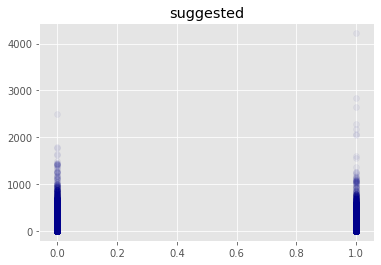

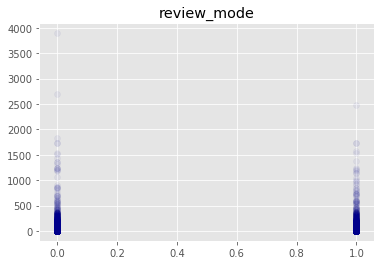

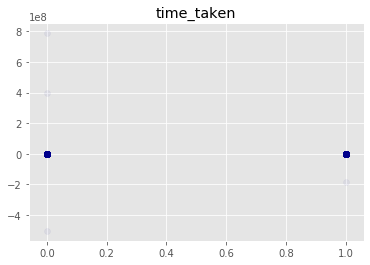

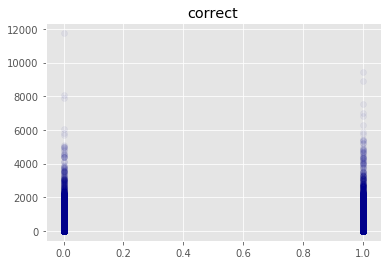

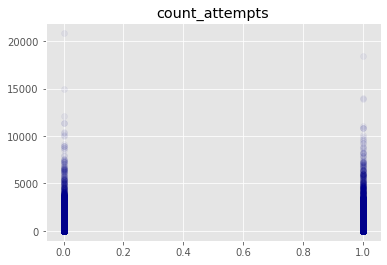

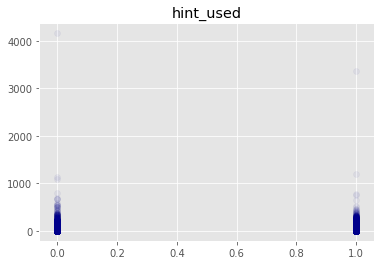

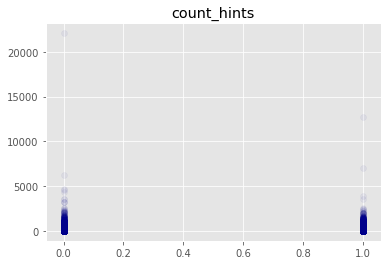

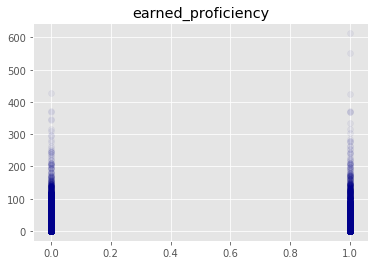

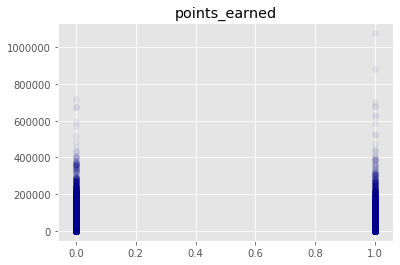

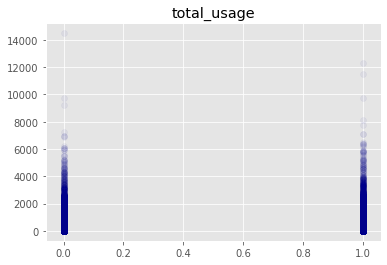

In [485]:
for col in list(user_table.columns.values[:-9]): 
    fig, ax = plt.subplots()
    ax.scatter(user_table['target'], user_table[col], alpha=.05, color='darkblue')
    ax.set_title(col)


### Looking at Usage Per Month

In [528]:
months = pd.read_pickle('../junyi_df.pickle')

months.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25925992 entries, 0 to 25925991
Data columns (total 17 columns):
user_id                 int64
exercise                object
problem_type            object
problem_number          int64
topic_mode              bool
suggested               bool
review_mode             bool
time_done               int64
time_taken              int64
time_taken_attempts     object
correct                 bool
count_attempts          int64
hint_used               bool
count_hints             int64
hint_time_taken_list    object
earned_proficiency      bool
points_earned           int64
dtypes: bool(6), int64(7), object(4)
memory usage: 2.3+ GB


In [529]:
#Convert Unix datetime to DateTime
months = convert_dates(months, 'time_done')


In [530]:
#Choosing Date Range
months= select_date(months, 'time_done', '1/1/2014', '12/31/2014')


In [533]:
months['month'] = months['time_done'].dt.month

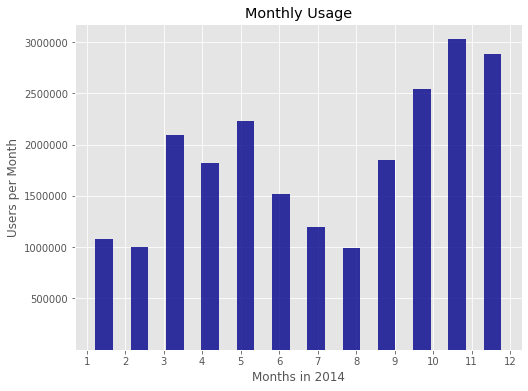

In [557]:
fig, ax = plt.subplots(figsize=(8,6))

ax.hist(months['month'], bins=12, alpha=.8, rwidth=.5, bottom=1, color='darkblue')
ax.set_title('Monthly Usage')
ax.set_xlabel('Months in 2014')
ax.set_ylabel('Users per Month')
ax.set_xticks(range(1,13))
fig.savefig('images/monthly.png')